### 问题 1
#### 我们的自变量是什么？因变量是什么？

> 答案：该项目的自变量是2因素的单词和颜色一致性。一个单词所代表的含义是一致的，所表示的颜色也是一致的，但通过组合可以用来表示一致或不一致，通过布尔变量表示。
       
> 
因变量是参与者说出同等大小的列表中的墨色名称的时间。

##  问题 2
#### 此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。
> 此任务的假设集如下:

$$ H_{0}:\mu_{c} = \mu_{i}  $$
$$ H_{1}:\mu_{c} < \mu_{i}  $$

> 零假设是一致文件条件下总体均值的结果等于非一致条件下的总体均值。调整假设是一致文字条件总体均值的结果小于非一致文字条件下的总体均值。

> 选择t-试验。因为每一项实验观察结果都是由同一个人完成的，并且彼此没有依赖。选择t-试验而不选择z-试验，主要由以下几个原因。


- 假定高斯分布的正态性
- 样本总数小于30，小样本适用于t-试验，小样本时t-试验的结果集更为集中。
- 没有总体标准偏差的数据。


> 选择单尾检验，因为直觉告诉我们由于颜色与文字同时加持带来的困惑，一致文字条件下的测试结果强于非一致文字条件下的测试结果。
按照惯例选择alpha值等于0.05作为假设试验。

### 问题 3
#### 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。
> 一致文字条件下的测试，平均时间为14.05秒，方差为12.67秒

> 不一致文字条件下的测试，平均时间为22.02秒，方差为23.01秒

In [2]:
import csv
import scipy.stats

dat = []
directory = '/users/home/google drive/education/datasets/dataanalystudacity/'
with open( 'stroopdata.csv', 'rb') as csvfile:
    dat_raw = csv.reader(csvfile)
    next(dat_raw, None)
    for row in dat_raw:
        dat.append(row)
        
congruent = [float(x[0]) for x in dat]
incongruent = [float(x[1]) for x in dat]

In [3]:
scipy.stats.describe(congruent)

DescribeResult(nobs=24L, minmax=(8.6300000000000008, 22.327999999999999), mean=14.051124999999999, variance=12.669029070652174, skewness=0.3903776149050628, kurtosis=-0.4048936841311477)

In [4]:
scipy.stats.describe(incongruent)

DescribeResult(nobs=24L, minmax=(15.686999999999999, 35.255000000000003), mean=22.015916666666669, variance=23.011757036231884, skewness=1.4491357281474821, kurtosis=1.9204728550911758)

### 问题 4
#### 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。
> 第一个可视化图展示了参与者在两种测试条件下的表现，一致文字条件和非一致文字条件似乎是相关联的，在一致文字条件下表现良好的人，在非一致文字条件下也会表现的很好，说明可能有其他因素影响着参与者的表现。

> 第二个可视化图用来比较一致文字条件和非一致文字条件下的结果。能够明显的从图中发现二者的区别。实际上，非一致文字条件的下界没有包含在一致文字条件的均值内。因此，可以较为肯定的说明一致文字条件下参与者的表现强于非一致文字条件下参与者的表现。

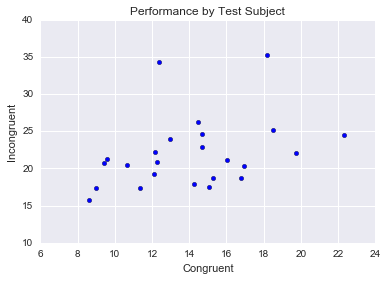

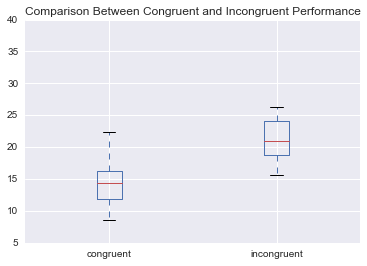

In [6]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.scatter(congruent, incongruent)
plt.title('Performance by Test Subject')
plt.xlabel('Congruent')
plt.ylabel('Incongruent')

df = pd.DataFrame({
        'congruent': congruent,
        'incongruent': incongruent
    })

df.plot(kind='box', title='Comparison Between Congruent and Incongruent Performance')


## 问题 5
#### 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？
> t-试验的临界值为1.1714，t统计值为-8.021，并且p值小于0.0001.基于以上结果，拒绝零假设。研究表明，参与者在一致条件下的速度明显快过非一致条件下的速度。符合我们的预期，并且给出了合理的解释用来发现二者的区别。

In [7]:
from scipy import stats

d = np.array(congruent) - np.array(incongruent)
mean = d.mean()
std = d.std(ddof=1)
n = int(len(dat))
crit = 1.714 # for df = 23, one-tailed, and confidence level of 95%

tt = (mean-0) / (std / np.sqrt(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)

if np.round(pval, 4) == 0:
    pval=0.0001

print 'N = {} t-critical = {:2.3f} t-statistic = {:2.3f} pvalue = {:2.4f}'.format(n, crit, tt, pval)

N = 24 t-critical = 1.714 t-statistic = -8.021 pvalue = 0.0001


### 问题 6 可选
#### 你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！
> 摘录自维基百科的斯特鲁普效应点我们理论解释了我们的观察：
>> 在干扰理论的相关研究中，最常见的类似替代任务类似于斯特鲁普的第二个实验，单词所描述的颜色和与实际颜色不匹配的情况。

> 维基百科中这样解释的：
>> 干扰理论是关于人类记忆的理论。当学习新材料和过去学到的行为、记忆或思想对理解新材料产生负面影响的传递效果之间的相互作用时，学习就会发生干扰.。把记忆旧知识的影响，影响速度的学习和记忆能力。

> 这是证据的斯特鲁普效应的根本原因是相互矛盾的信息，导致学习延迟。因此，类似的实验，我们可能会期望类似的结果是测试冲突的信息的数字和大小的数字，要求考生匹配的数字语义，而不是它的大小。

#### sources
> http://stackoverflow.com/questions/14257373/skip-the-headers-when-editing-a-csv-file-using-python

> http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.describe.html

> http://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning

> http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

> http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

> https://people.richland.edu/james/lecture/m170/tbl-t.html

> https://en.wikipedia.org/wiki/Stroop_effect

> https://en.wikipedia.org/wiki/Interference_theory

> http://blog.sina.com.cn/s/blog_598c175b0100rngb.html

> https://zhidao.baidu.com/question/242434317593668244.html

> http://anony3721.blog.163.com/blog/static/51197420120204858875/